##  Problem: 
### Book-my-show will enable the ads on their website but they are also very cautious about their user privacy and information who visit their website.  Some ads URL could contain a malicious link that can trick any receipient and lead to a malware installation, freezing the system as part of a ransomware attack or revealing sensitive information.  Book-my-show wants to analyze that whether the particular URL is prone to phishing (malicious) or not.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, roc_curve,auc
from sklearn.model_selection import cross_val_score

In [2]:
data=pd.read_csv("dataset.csv")

In [3]:
data.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [4]:
data=data.drop(["index"],axis=1)

In [5]:
#1  Each sample has 32 features ranging from -1,0,1. Explore the data using histogram, heatmaps. 

<AxesSubplot:>

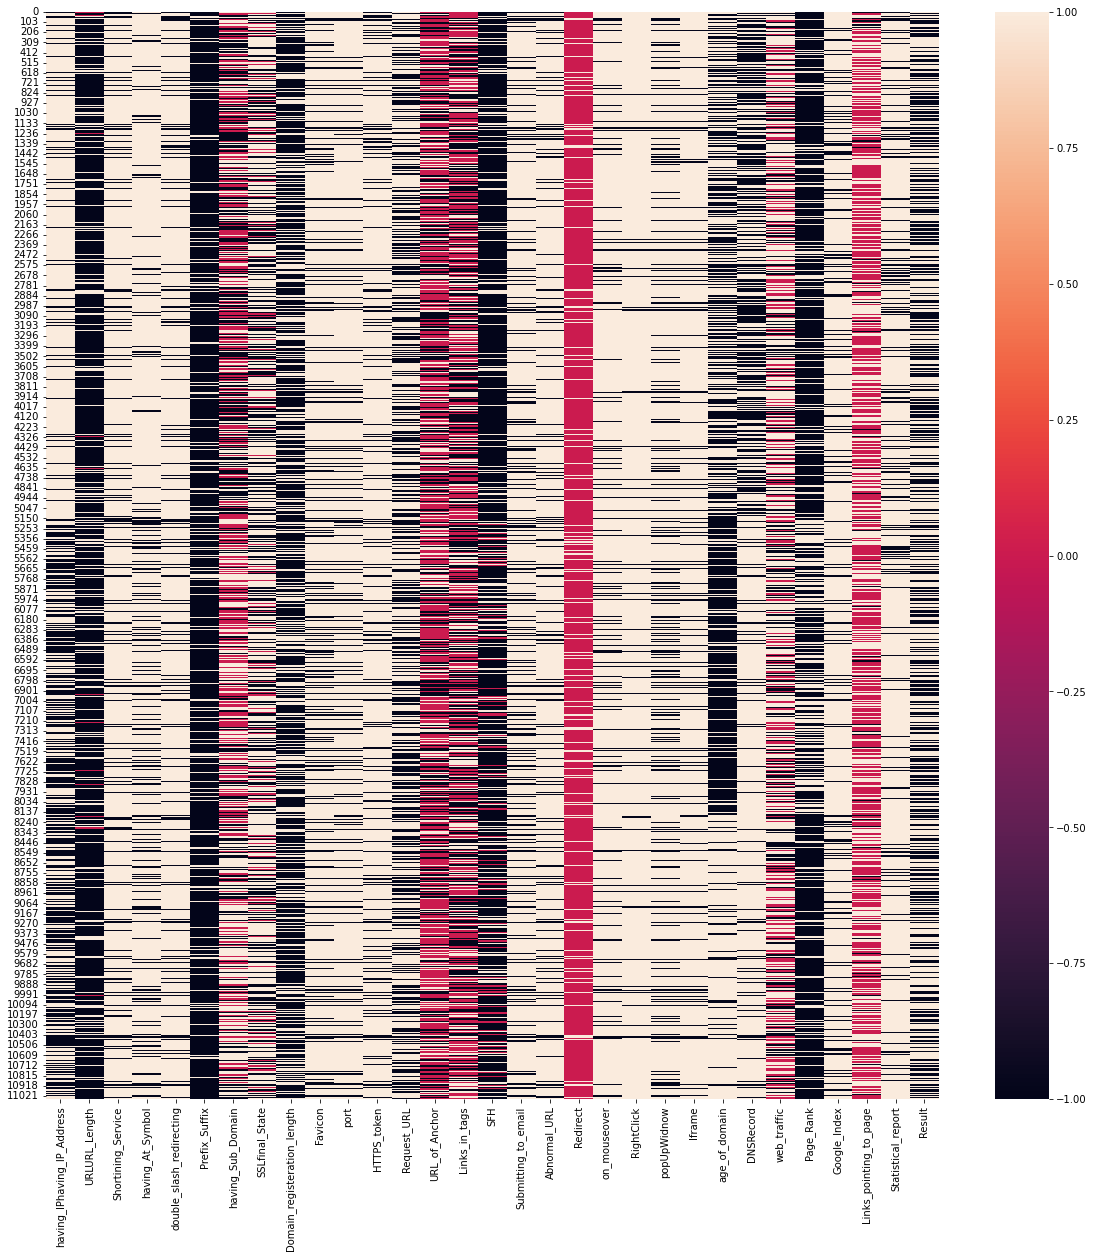

In [6]:
fig = plt.figure(figsize=(20,20))
sns.heatmap(data)

array([[<AxesSubplot:title={'center':'having_IPhaving_IP_Address'}>,
        <AxesSubplot:title={'center':'URLURL_Length'}>,
        <AxesSubplot:title={'center':'Shortining_Service'}>,
        <AxesSubplot:title={'center':'having_At_Symbol'}>,
        <AxesSubplot:title={'center':'double_slash_redirecting'}>,
        <AxesSubplot:title={'center':'Prefix_Suffix'}>],
       [<AxesSubplot:title={'center':'having_Sub_Domain'}>,
        <AxesSubplot:title={'center':'SSLfinal_State'}>,
        <AxesSubplot:title={'center':'Domain_registeration_length'}>,
        <AxesSubplot:title={'center':'Favicon'}>,
        <AxesSubplot:title={'center':'port'}>,
        <AxesSubplot:title={'center':'HTTPS_token'}>],
       [<AxesSubplot:title={'center':'Request_URL'}>,
        <AxesSubplot:title={'center':'URL_of_Anchor'}>,
        <AxesSubplot:title={'center':'Links_in_tags'}>,
        <AxesSubplot:title={'center':'SFH'}>,
        <AxesSubplot:title={'center':'Submitting_to_email'}>,
        <AxesSubpl

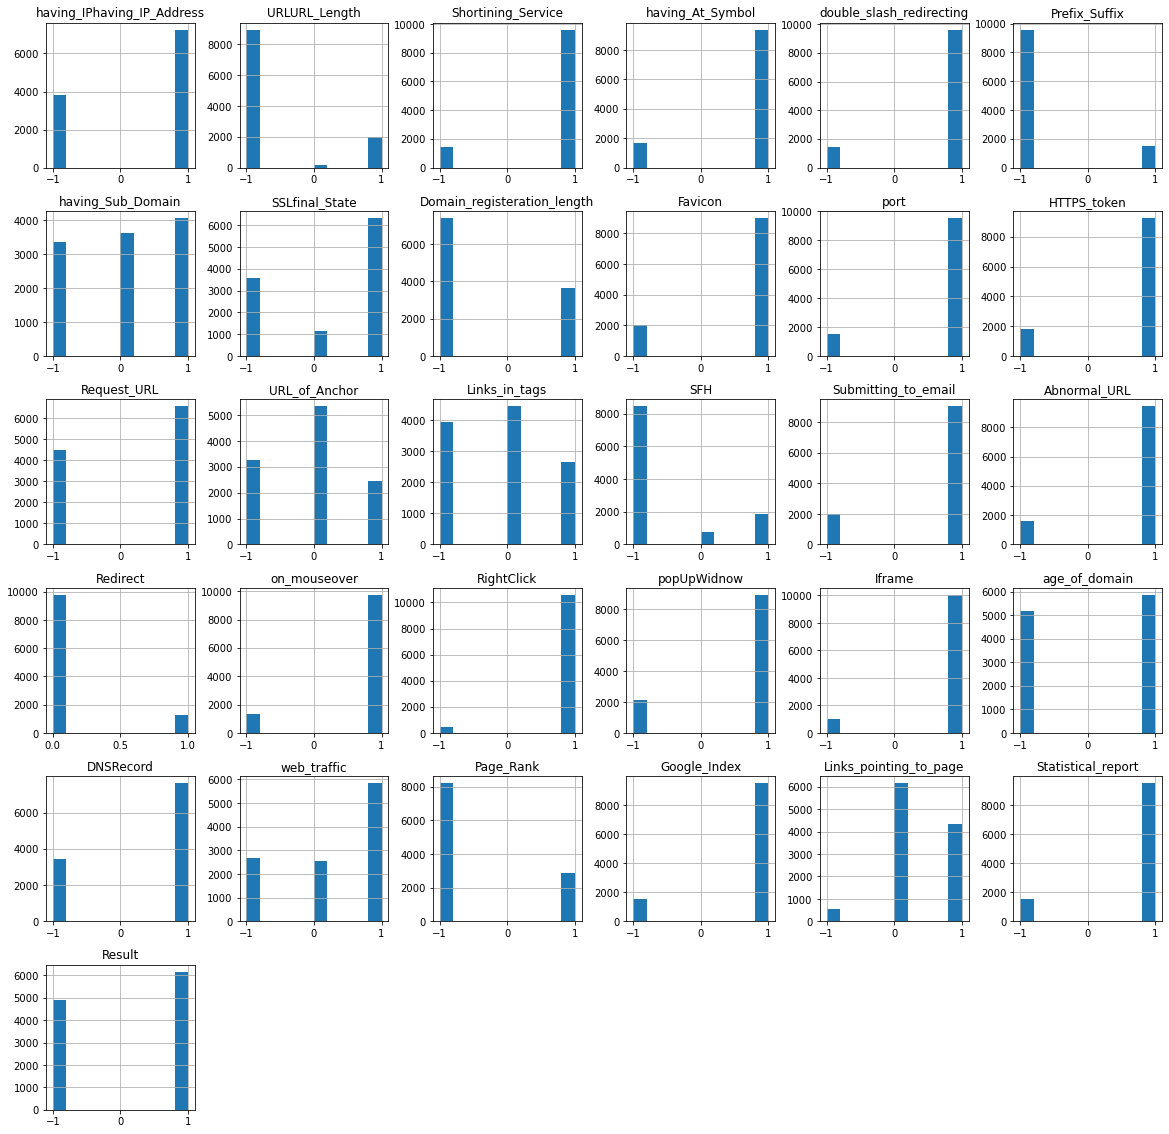

In [7]:
data.hist(figsize=(20,20))

In [8]:
#2 Determine the number of samples present in the data, unique elements in all the features. 
data.columns

Index(['having_IPhaving_IP_Address', 'URLURL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [9]:
for col in data.columns:
    uc = pd.DataFrame(data[col].value_counts())
    ucn = (data[col].value_counts(normalize=True)*100).round(2)
    uc["percentage"] = ucn.values.reshape(-1,1)
    uc = uc.reset_index()
    uc = uc.rename(columns={col:"Counts","index":"Unique Values"})
    print ("Column Name : ",col)
    print (uc)
    print ("\n")

Column Name :  having_IPhaving_IP_Address
   Unique Values  Counts  percentage
0              1    7262       65.69
1             -1    3793       34.31


Column Name :  URLURL_Length
   Unique Values  Counts  percentage
0             -1    8960       81.05
1              1    1960       17.73
2              0     135        1.22


Column Name :  Shortining_Service
   Unique Values  Counts  percentage
0              1    9611       86.94
1             -1    1444       13.06


Column Name :  having_At_Symbol
   Unique Values  Counts  percentage
0              1    9400       85.03
1             -1    1655       14.97


Column Name :  double_slash_redirecting
   Unique Values  Counts  percentage
0              1    9626       87.07
1             -1    1429       12.93


Column Name :  Prefix_Suffix
   Unique Values  Counts  percentage
0             -1    9590       86.75
1              1    1465       13.25


Column Name :  having_Sub_Domain
   Unique Values  Counts  percentage
0        

In [10]:
#3  Check if there is any null value in any features. 

In [11]:
data.isnull().sum()

having_IPhaving_IP_Address     0
URLURL_Length                  0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

In [12]:
#4  Next, we have to find if there are any correlated features present in the data. 
#   Remove the feature which might be correlated with some threshold.

In [13]:
def dropCorrCol(cor_matrix, thres=0.95):
    upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > thres)]
    return to_drop

In [14]:
data1 = data.drop(dropCorrCol(data.drop(['Result'],axis=1).corr().abs(),0.6),axis=1)
data1

C:\Users\ADMIN\AppData\Local\Temp/ipykernel_10036/1952203890.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,URL_of_Anchor,...,Redirect,RightClick,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,1,-1,...,0,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,-1,0,1,-1,1,0,...,0,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,-1,-1,-1,-1,1,0,...,0,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,-1,-1,-1,1,1,0,...,0,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,-1,1,1,-1,1,0,...,0,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,-1,1,-1,1,1,1,-1,-1,1,...,0,-1,1,1,-1,-1,1,1,1,1
11051,-1,1,1,-1,-1,1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,-1,1,-1
11052,1,-1,1,1,-1,1,-1,-1,1,0,...,0,1,1,1,1,-1,1,0,1,-1
11053,-1,-1,1,1,-1,-1,-1,1,-1,-1,...,0,1,1,1,1,-1,1,1,1,-1


In [15]:
#Finally, build a robust classification system that classifies whether the URL sample is a phishing site or not.

#Build classification models using a binary classifier to detect malicious or phishing URLs.

In [16]:
# Trial No 1 for identifying a best classifier.
# Using Pipeline for checking what are all the best model in a normal params.

In [17]:
pipeline_lr = Pipeline([('pca1',PCA(n_components=2)),('lr_classifier',LogisticRegression(random_state=0))])
pipeline_dt = Pipeline([('pca2',PCA(n_components=2)),('dt_classifier',DecisionTreeClassifier())])
pipeline_rf = Pipeline([('pca3',PCA(n_components=2)),('rf_classifier',RandomForestClassifier())])
pipeline_gb = Pipeline([('pca4',PCA(n_components=2)),('Gradient_Boosting_classifier',GradientBoostingClassifier(n_estimators=1000, learning_rate=1.0,max_depth=1, random_state=0))])

In [18]:
pipelines = [pipeline_lr,pipeline_dt,pipeline_rf,pipeline_gb]

In [19]:
best_accuracy=0
best_classifier=0
best_pipeline=""

In [20]:
pipe_dict={0:'Logistic Regression',1:'Decision Tree Classifier', 2:'Random Forest Classifier',3:'Gradient Boosting  Classifier'}

In [21]:
X_train,X_test,y_train,y_test = train_test_split(data1.drop(['Result'],axis=1),data1['Result'],train_size=0.7,random_state=0)

In [22]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((7738, 21), (3317, 21), (7738,), (3317,))

In [23]:
for pipe in pipelines:
    pipe.fit(X_train,y_train)

In [24]:
for i,model in enumerate(pipelines):
    print (pipe_dict[i], "Test Accuracy  : ",model.score(X_test,y_test))

Logistic Regression Test Accuracy  :  0.8679529695507989
Decision Tree Classifier Test Accuracy  :  0.9176967138981007
Random Forest Classifier Test Accuracy  :  0.9270425082906241
Gradient Boosting  Classifier Test Accuracy  :  0.8782031956587277


In [25]:
#  In the Trial No.1, Random Forest & Decision Tree Classifier Found as good models

In [26]:
#  Trial No.2 for identifying a best classifier.
#  Using Grid Search CV to find optimized parameters.

In [27]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            
        }
    },
    'Gradient Boosting': {
        'model':GradientBoostingClassifier(),
        'params':{
            'n_estimators':[500,800,1000],
            'learning_rate':[0.8,1],
            'max_depth':[3,4,5],
            'random_state':[0,42]
        }
    }
    
}

In [28]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(data1.drop(['Result'],axis=1),data1['Result'])
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.954048,"{'C': 20, 'kernel': 'rbf'}"
1,random_forest,0.962099,{'n_estimators': 10}
2,logistic_regression,0.921755,{'C': 1}
3,naive_bayes_gaussian,0.597919,{}
4,decision_tree,0.952601,{'criterion': 'gini'}
5,Gradient Boosting,0.962008,"{'learning_rate': 0.8, 'max_depth': 4, 'n_esti..."


In [29]:
df.sort_values(by=['best_score'],ascending=False)

,model,best_score,best_params
1,random_forest,0.962099,{'n_estimators': 10}
5,Gradient Boosting,0.962008,"{'learning_rate': 0.8, 'max_depth': 4, 'n_esti..."
0,svm,0.954048,"{'C': 20, 'kernel': 'rbf'}"
4,decision_tree,0.952601,{'criterion': 'gini'}
2,logistic_regression,0.921755,{'C': 1}
3,naive_bayes_gaussian,0.597919,{}


In [30]:
#Illustrate the diagnostic ability of this binary classifier by plotting the ROC curve.

In [31]:
pipeline_rf = Pipeline([('rf_classifier',RandomForestClassifier(n_estimators=10))])
pipeline_rf.fit(X_train,y_train)
pipeline_rf.score(X_test,y_test)
y_pred = pipeline_rf.predict_proba(X_test)
rf_fpr,rf_tpr,rf_thres = roc_curve(y_test,y_pred[:,1])
auc_rf = auc(rf_fpr,rf_tpr)

In [32]:
pipeline_gb = Pipeline([('pca4',PCA(n_components=2)),('Gradient_Boosting_classifier',GradientBoostingClassifier(n_estimators=1000, learning_rate=0.8,max_depth=4, random_state=0))])
pipeline_gb.fit(X_train,y_train)
pipeline_gb.score(X_test,y_test)
y_pred = pipeline_gb.predict_proba(X_test)
gb_fpr,gb_tpr,gb_thres = roc_curve(y_test,y_pred[:,1])
auc_gb = auc(gb_fpr,gb_tpr)

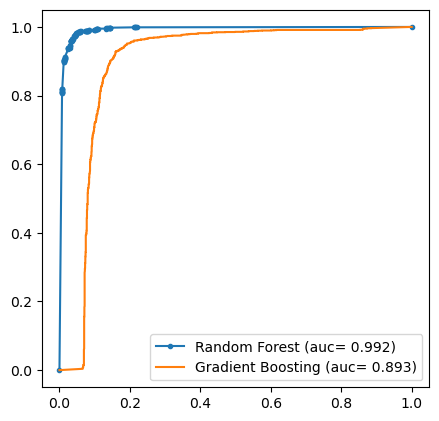

In [33]:
plt.figure(figsize=(5,5),dpi=100)
plt.plot(rf_fpr,rf_tpr, linestyle='-', marker='.',label='Random Forest (auc= %0.3f)' % auc_rf)
plt.plot(gb_fpr,gb_tpr,linestyle='-', label='Gradient Boosting (auc= %0.3f)' % auc_gb)
plt.legend()
plt.xlabel= "False Positive Rate"
plt.ylabel = "True Positive Rate"
plt.show()

In [34]:
#Validate the accuracy of data by the K-Fold cross-validation technique.

In [35]:
cvs_rf = cross_val_score(RandomForestClassifier(n_estimators=10),data1.drop(['Result'],axis=1),data1['Result'])
print ( "K-Fold Cross Validation Result for Random Forest : ", cvs_rf)
print ("Average Random Forest Accuracy Score : " ,cvs_rf.mean())

K-Fold Cross Validation Result for Random Forest :  [0.97467209 0.97602895 0.97286296 0.95612845 0.94482135]
Average Random Forest Accuracy Score :  0.9649027589326096


In [36]:
cvs_gb = cross_val_score(GradientBoostingClassifier(n_estimators=1000, learning_rate=0.8,max_depth=4, random_state=0),data1.drop(['Result'],axis=1),data1['Result'])
print ( "K-Fold Cross Validation Result for Gradient Boosting : ", cvs_gb)
print ("Average Gradient Boosting Accuracy Score : " , cvs_gb.mean())

K-Fold Cross Validation Result for Gradient Boosting :  [0.97874265 0.97602895 0.97150611 0.94753505 0.93215739]
Average Gradient Boosting Accuracy Score :  0.9611940298507463


In [37]:
#The final output consists of the model, which will give maximum accuracy on the validation dataset with selected attributes.

In [38]:
#  Random Forest Classifier gives highest accuracy of 96.5% having n_estimators=10

In [39]:
#  However, Gradient Boosting Classifier score is also 96.11% which is almost equal to Random Forest by setting
#  the params of n_estimators=1000, learning_rate=0.8,max_depth=4, random_state=0.